# Posttest 3 Kecerdasan Buatan
## Nama = Reviansa Fakhruddin Aththar
## NIM  = 2209106066



### Import Library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l2

### Import dataset yang akan digunakan

In [2]:
train_df = pd.read_csv('fng_train.csv')
test_df = pd.read_csv('fng_test.csv')

### Menyiapkan features and target

In [3]:
features = ['fng_value', 'fng_encoded', 'fng_ma7', 'fng_ma30', 'fng_change',
            'fng_volatility', 'day_sin', 'day_cos', 'fng_rsi']
target = 'sentiment_simple'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

### Encode variabel target

In [4]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### Konversi ke kategorikal

In [5]:
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)


### Penskalaan fitur

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Membuat model

In [7]:
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


### Kompilasi model

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Menyiapkan callbacks

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

### Melatih model

In [10]:
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.7224 - loss: 0.7599 - val_accuracy: 0.8915 - val_loss: 0.3484 - learning_rate: 0.0010
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9017 - loss: 0.2657 - val_accuracy: 0.9127 - val_loss: 0.2456 - learning_rate: 0.0010
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - loss: 0.1847 - val_accuracy: 0.9815 - val_loss: 0.1035 - learning_rate: 0.0010
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9257 - loss: 0.1741 - val_accuracy: 0.9974 - val_loss: 0.0631 - learning_rate: 0.0010
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1347 - val_accuracy: 1.0000 - val_loss: 0.0180 - learning_rate: 0.0010
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: 0.1430 - val_accuracy: 1.0000 - val_loss: 0.0101 - learning_rate: 0.0010
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9453 - loss: 0.1501 - val_

### Evaluasi model

In [11]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_cat, verbose=0)
val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

print(f"Akurasi Pelatihan: {train_accuracy:.4f}")
print(f"Akurasi Validasi: {val_accuracy:.4f}")


Akurasi Pelatihan: 1.0000
Akurasi Validasi: 1.0000


### Plot riwayat pelatihan

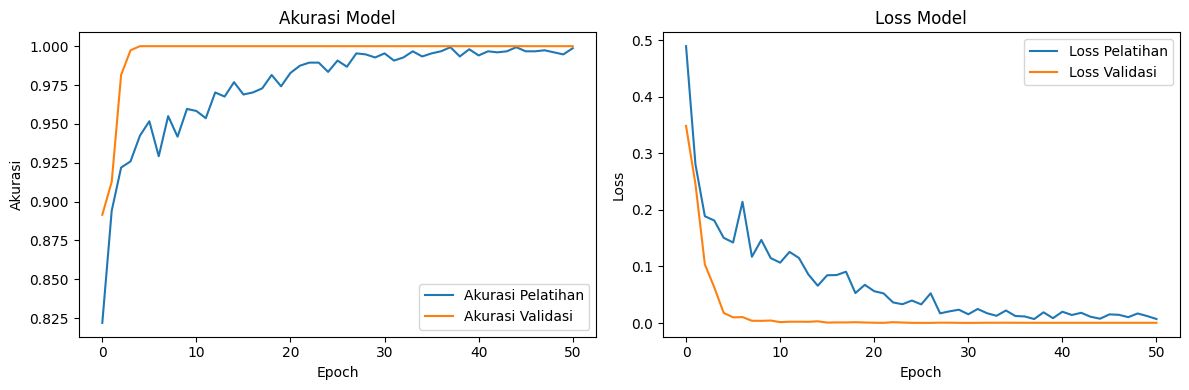

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Prediksi dan evaluasi lebih lanjut

In [13]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Bearish       1.00      1.00      1.00       248
     Bullish       1.00      1.00      1.00       171
     Neutral       1.00      1.00      1.00        54

    accuracy                           1.00       473
   macro avg       1.00      1.00      1.00       473
weighted avg       1.00      1.00      1.00       473



### Plot confusion matrix

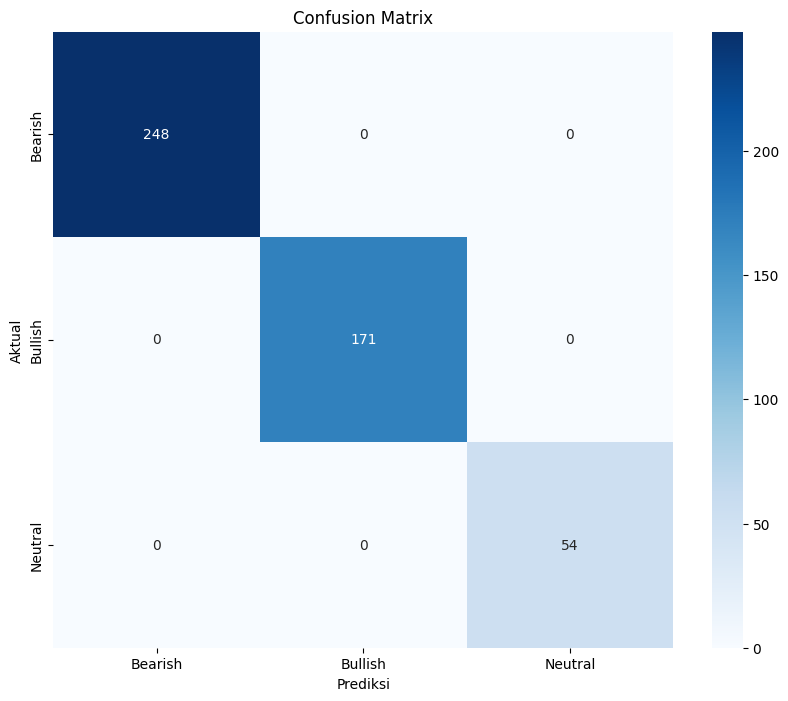

In [14]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### Reshape data untuk Conv1D

In [15]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def create_model():
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


### K-fold cross-validation

In [16]:
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train_reshaped)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold, X_val_fold = X_train_reshaped[train_idx], X_train_reshaped[val_idx]
    y_train_fold, y_val_fold = y_train_cat[train_idx], y_train_cat[val_idx]

    model = create_model()

    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])
    print(f"Fold {fold+1} accuracy: {scores[1]:.4f}")

print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

Fold 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 1.0000
Fold 2/10
Fold 2 accuracy: 1.0000
Fold 3/10
Fold 3 accuracy: 1.0000
Fold 4/10
Fold 4 accuracy: 1.0000
Fold 5/10
Fold 5 accuracy: 1.0000
Fold 6/10
Fold 6 accuracy: 1.0000
Fold 7/10
Fold 7 accuracy: 1.0000
Fold 8/10
Fold 8 accuracy: 1.0000
Fold 9/10
Fold 9 accuracy: 1.0000
Fold 10/10
Fold 10 accuracy: 1.0000
Mean cross-validation accuracy: 1.0000 (+/- 0.0000)


### Train model final

In [17]:
final_model = create_model()
final_history = final_model.fit(
    X_train_reshaped, y_train_cat,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.5063 - loss: 3.5517 - val_accuracy: 0.3889 - val_loss: 3.0445 - learning_rate: 0.0010
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7498 - loss: 2.6642 - val_accuracy: 0.3571 - val_loss: 3.1185 - learning_rate: 0.0010
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 2.3594 - val_accuracy: 0.3571 - val_loss: 3.2363 - learning_rate: 0.0010
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 2.1553 - val_accuracy: 0.3571 - val_loss: 3.1715 - learning_rate: 0.0010
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9018 - loss: 1.9938 - val_accuracy: 0.3598 - val_loss: 2.8515 - learning_rate: 0.0010
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9157 - loss: 1.8318 - val_accuracy: 0.3889 - val_loss: 2.5581 - learning_rate: 0.0010
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9257 - loss: 1.6797 - val_

### Evaluasi model

In [18]:
train_loss, train_accuracy = model.evaluate(X_train_reshaped, y_train_cat, verbose=0)
val_loss, val_accuracy = model.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print(f"Akurasi Pelatihan: {train_accuracy:.4f}")
print(f"Akurasi Validasi: {val_accuracy:.4f}")

Akurasi Pelatihan: 1.0000
Akurasi Validasi: 1.0000


### Plot riwayat pelatihan (Baru)

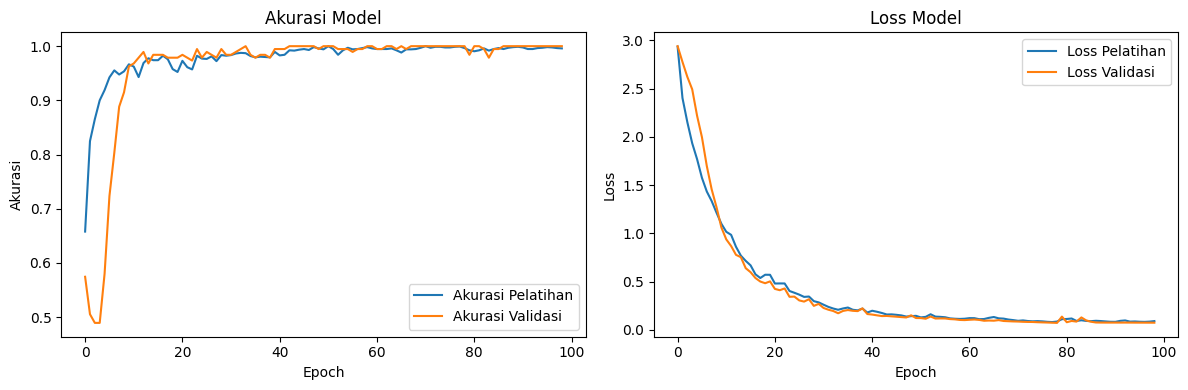

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Prediksi dan evaluasi lebih lanjut (Baru)

In [20]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Bearish       1.00      1.00      1.00       248
     Bullish       1.00      1.00      1.00       171
     Neutral       1.00      0.98      0.99        54

    accuracy                           1.00       473
   macro avg       1.00      0.99      1.00       473
weighted avg       1.00      1.00      1.00       473



# Plot confusion matrix (Baru)

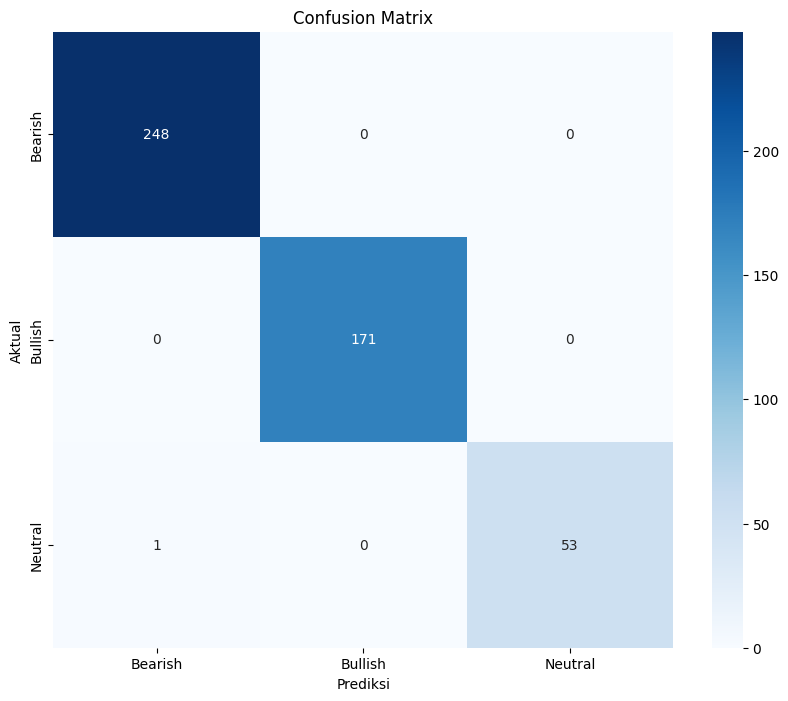

In [21]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Setelah membandingkan kedua hasil model, dapat disimpulkan bahwa model baru menunjukkan performa yang lebih unggul dan lebih cocok untuk digunakan.

Model baru mencapai akurasi sempurna 100% untuk semua kelas, termasuk kelas Neutral yang sebelumnya memiliki sedikit kesalahan. Selain itu, model baru konvergen lebih cepat, hanya membutuhkan sekitar 5-10 epoch dibandingkan 20-40 epoch pada model sebelumnya. Loss model baru juga jauh lebih rendah sejak awal pelatihan, menunjukkan pembelajaran yang lebih efisien.

Meskipun kedua model menampilkan performa yang sangat baik, peningkatan pada kelas Neutral dan kecepatan konvergensi membuat model baru lebih direkomendasikan.